In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
from keras.datasets import cifar10

import numpy as np
import tensorflow as tf

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()


In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [7]:
input_img = Input(shape = (28, 28, 1))

In [8]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

In [9]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

In [10]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
autoencoder.fit(x_train_noisy, x_train, 
                epochs=100, 
                batch_size=32, 
                shuffle=True, 
                validation_data=(x_test_noisy,x_test))

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1257 - val_loss: 0.1045
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1025 - val_loss: 0.0997
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0994 - val_loss: 0.0976
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0977 - val_loss: 0.0976
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0967 - val_loss: 0.0954
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0961 - val_loss: 0.0953
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0957 - val_loss: 0.0961
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0954 - val_loss: 0.0948
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0951 - val_loss: 0.0944
Epoch 10/100
1875/1875 [==============================] - 7s 3ms/step - l

Epoch 80/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0931
Epoch 81/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 82/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0933
Epoch 83/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0930
Epoch 84/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0932
Epoch 85/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0936
Epoch 86/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0928
Epoch 87/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 88/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 89/100
1875/1875 [==============================] - 6s 3ms

In [14]:
decoded_imgs = autoencoder.predict(x_test_noisy)

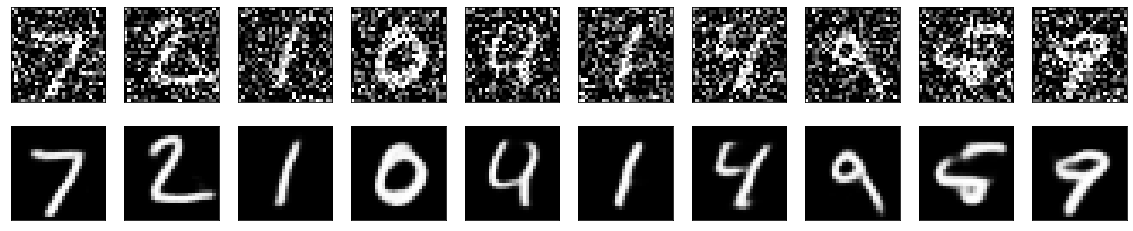

In [15]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  #display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)